In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data
train_images = x_train.reshape(60000, 784).astype('float32') / 255.0
test_images = x_test.reshape(10000, 784).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

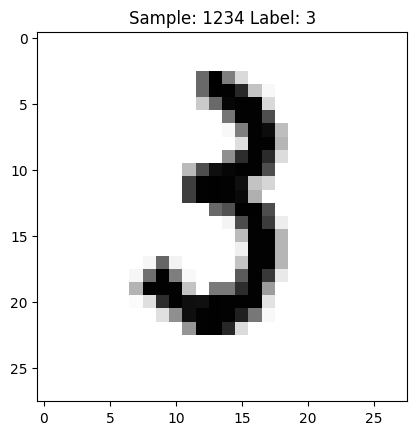

In [11]:
# Visualize a sample
def display_sample(num):
    label = y_train[num].argmax(axis=0)
    image = train_images[num].reshape([28, 28])
    plt.title(f'Sample: {num} Label: {label}')
    plt.imshow(image, cmap='gray_r')
    plt.show()

display_sample(1234)

 

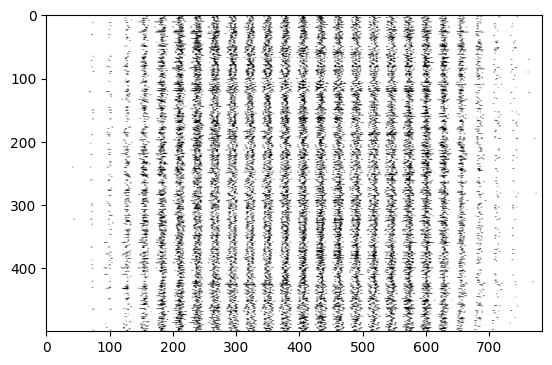

In [12]:
#Here’s a way to visualize how the data is being fed into the model:

images = x_train[0].reshape([1,784])

for i in range(1, 500):
    images = np.concatenate((images, x_train[i].reshape([1,784])))

plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [17]:
# Define the model
input_images = Input(shape=(784,))
hidden_layer = Dense(512, activation='relu')(input_images)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model = Model(inputs=input_images, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, y_train, epochs=20, batch_size=100)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2502 - accuracy: 0.9294
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1005 - accuracy: 0.9705
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0654 - accuracy: 0.9804
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0456 - accuracy: 0.9863
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0332 - accuracy: 0.9902
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0237 - accuracy: 0.9933
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0188 - accuracy: 0.9945
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0134 - accuracy: 0.9968
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0121 - accuracy: 0.9967
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.9974

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - loss: 0.0882 - accuracy: 0.9807 - 750ms/epoch - 2ms/step
Test accuracy: 0.9807000160217285


313/313 [==============================] - 0s 1ms/step
Number of misclassified images: 193


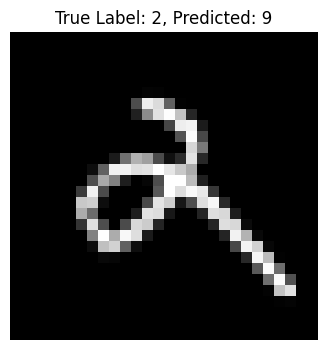

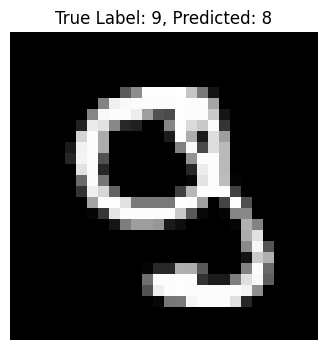

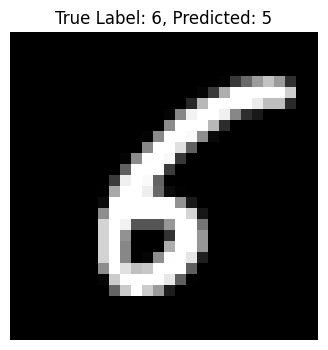

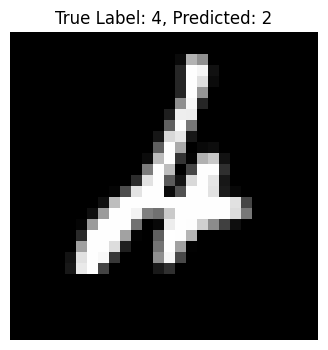

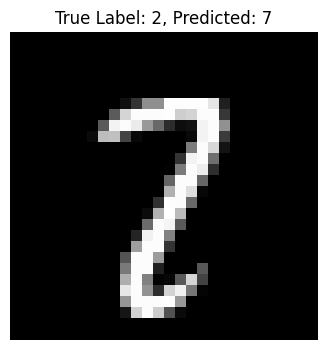

In [19]:
# Get predictions for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Predicted class
actual_labels = np.argmax(y_test, axis=1)          # Actual class

# Find misclassified images
misclassified_indices = np.where(predicted_labels != actual_labels)[0]

print(f"Number of misclassified images: {len(misclassified_indices)}")

# Function to display misclassified images
def display_misclassified(index):
    plt.figure(figsize=(4, 4))
    image = test_images[index].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {actual_labels[index]}, Predicted: {predicted_labels[index]}")
    plt.axis('off')
    plt.show()

# Show the first 5 misclassified images
for i in range(5):
    display_misclassified(misclassified_indices[i])

In [20]:
# More neurons
input_images = Input(shape=(784,))
hidden_layer = Dense(1024, activation='relu')(input_images)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model = Model(inputs=input_images, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, y_train, epochs=20, batch_size=100)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2218 - accuracy: 0.9352
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9743
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0527 - accuracy: 0.9839
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0356 - accuracy: 0.9892
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0261 - accuracy: 0.9920
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9948
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0109 - accuracy: 0.9969
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0115 - accuracy: 0.9962

In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - loss: 0.0883 - accuracy: 0.9826 - 778ms/epoch - 2ms/step
Test accuracy: 0.9825999736785889


In [22]:
# Fewer neurons
input_images = Input(shape=(784,))
hidden_layer = Dense(256, activation='relu')(input_images)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model = Model(inputs=input_images, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, y_train, epochs=20, batch_size=100)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2892 - accuracy: 0.9182
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1224 - accuracy: 0.9643
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0837 - accuracy: 0.9751
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0606 - accuracy: 0.9815
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0464 - accuracy: 0.9867
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0359 - accuracy: 0.9896
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9921
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9938
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0179 - accuracy: 0.9954
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9962

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - loss: 0.0871 - accuracy: 0.9796 - 632ms/epoch - 2ms/step
Test accuracy: 0.9796000123023987


In [29]:
from tensorflow.keras.optimizers import Adam
#different learning rates
learning_rates = [0.01, 0.001, 0.0001, 0.00001]

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, y_train, epochs=20, batch_size=100)
    test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
    print(f'Test accuracy: {test_acc}\n')

Testing learning rate: 0.01
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0457 - accuracy: 0.9960  
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0462 - accuracy: 0.9956
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0506 - accuracy: 0.9961
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0389 - accuracy: 0.9966
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9958
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0305 - accuracy: 0.9971
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0541 - accuracy: 0.9959
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0448 - accuracy: 0.9962
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0419 - accuracy: 0.9963
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - l

In [30]:
# 2 hidden layers
input_images = Input(shape=(784,))  # Input layer
hidden_layer1 = Dense(512, activation='relu')(input_images)  # First hidden layer
hidden_layer2 = Dense(512, activation='relu')(hidden_layer1)  # Second hidden layer
output_layer = Dense(10, activation='softmax')(hidden_layer2)  # Output layer
model = Model(inputs=input_images, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, y_train, epochs=20, batch_size=100)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2076 - accuracy: 0.9394
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0775 - accuracy: 0.9757
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0500 - accuracy: 0.9840
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0284 - accuracy: 0.9907
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0226 - accuracy: 0.9923
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0228 - accuracy: 0.9922
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0157 - accuracy: 0.9952
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0149 - accuracy: 0.9948
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0144 - accuracy: 0.9953

In [33]:
# 3 Batch sizes
input_images = Input(shape=(784,))  # Input layer
hidden_layer = Dense(512, activation='relu')(input_images)  # First hidden layer
output_layer = Dense(10, activation='softmax')(hidden_layer)  # Output layer
model = Model(inputs=input_images, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define batch sizes to test
batch_sizes = [32, 512, 1024]

# Loop over different batch sizes
for batch_size in batch_sizes:
    print(f"\nTesting batch size: {batch_size}")
    # Train the model
    model.fit(train_images, y_train, epochs=20, batch_size=batch_size, verbose=2)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
    print(f"Batch size: {batch_size}, Test accuracy: {test_acc}")


Testing batch size: 32
Epoch 1/20
1875/1875 - 4s - loss: 0.1999 - accuracy: 0.9409 - 4s/epoch - 2ms/step
Epoch 2/20
1875/1875 - 4s - loss: 0.0807 - accuracy: 0.9752 - 4s/epoch - 2ms/step
Epoch 3/20
1875/1875 - 4s - loss: 0.0530 - accuracy: 0.9832 - 4s/epoch - 2ms/step
Epoch 4/20
1875/1875 - 4s - loss: 0.0382 - accuracy: 0.9880 - 4s/epoch - 2ms/step
Epoch 5/20
1875/1875 - 4s - loss: 0.0282 - accuracy: 0.9909 - 4s/epoch - 2ms/step
Epoch 6/20
1875/1875 - 4s - loss: 0.0210 - accuracy: 0.9932 - 4s/epoch - 2ms/step
Epoch 7/20
1875/1875 - 4s - loss: 0.0181 - accuracy: 0.9940 - 4s/epoch - 2ms/step
Epoch 8/20
1875/1875 - 4s - loss: 0.0160 - accuracy: 0.9948 - 4s/epoch - 2ms/step
Epoch 9/20
1875/1875 - 4s - loss: 0.0110 - accuracy: 0.9964 - 4s/epoch - 2ms/step
Epoch 10/20
1875/1875 - 4s - loss: 0.0110 - accuracy: 0.9959 - 4s/epoch - 2ms/step
Epoch 11/20
1875/1875 - 4s - loss: 0.0102 - accuracy: 0.9965 - 4s/epoch - 2ms/step
Epoch 12/20
1875/1875 - 4s - loss: 0.0089 - accuracy: 0.9971 - 4s/epoch 